In [1]:
# import libraries
from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
tx_data = pd.read_csv('Final_Invoice.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
tx_data.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [6]:
tx_data['Invoice_DateTime'] = pd.to_datetime(tx_data['Invoice Date'] + ' ' + tx_data['Invoice Time'])

In [7]:
tx_data['JobCard_DateTime'] = pd.to_datetime(tx_data['JobCard Date'] + ' ' + tx_data['JobCard Time'])

In [8]:
tx_data['Service Time']=tx_data['Invoice_DateTime'].sub(tx_data['JobCard_DateTime'], axis=0)

In [9]:
tx_data['Service Hour'] = tx_data['Service Time'].apply(lambda x : (x.days * 24 + x.seconds//3600))

# Clustering based on Customers

In [10]:
df_clus =tx_data.groupby(['Customer No.','Make','Order Type'])['Service Hour','Total Amt Wtd Tax.'].mean().reset_index()
df_clus.head()

,Customer No.,Make,Order Type,Service Hour,Total Amt Wtd Tax.
0,1,MARUTI SUZUKI,Paid Service,2082.666667,0.00
1,1,MARUTI SUZUKI,Running Repairs,321.000000,0.00
2,10,GENERAL MOTORS,Paid Service,21.750000,2626.43
3,10,GENERAL MOTORS,Running Repairs,3.000000,599.84
4,100,HONDA,Accidental,98.000000,14167.07


In [11]:
#One-hot Encoding 'Make'
make = pd.get_dummies(df_clus['Make'], prefix='make')
df_clus= pd.concat([df_clus, make], axis=1)
df_clus.drop(['Make'],1,inplace=True)
df_clus.head()

,Customer No.,Order Type,Service Hour,Total Amt Wtd Tax.,make_AUDI,make_BMW,make_DAEWOO,make_FIAT,make_FORCE,make_FORD,make_GENERAL MOTORS,make_HINDUSTAN MOTORS,make_HONDA,make_HYUNDAI,make_JEEP,make_LAND ROVER,make_MAHINDRA & MAHINDRA,make_MARUTI SUZUKI,make_MERCEDES BENZ,make_MITSUBISHI MOTORS,make_MORRIS,make_NISSAN,make_PORCHE,make_PREMIER AUTOMOBILES,make_RENAULT,make_SAN MOTORS,make_SKODA,make_SONALIKA,make_TATA MOTORS,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO
0,1,Paid Service,2082.666667,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Running Repairs,321.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,Paid Service,21.750000,2626.43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,Running Repairs,3.000000,599.84,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,Accidental,98.000000,14167.07,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#One- hot encoding 'Order Type'
order = pd.get_dummies(df_clus['Order Type'], prefix='order')
df_clus= pd.concat([df_clus, order], axis=1)
df_clus.drop(['Order Type'],1,inplace=True)
df_clus.head()

,Customer No.,Service Hour,Total Amt Wtd Tax.,make_AUDI,make_BMW,make_DAEWOO,make_FIAT,make_FORCE,make_FORD,make_GENERAL MOTORS,make_HINDUSTAN MOTORS,make_HONDA,make_HYUNDAI,make_JEEP,make_LAND ROVER,make_MAHINDRA & MAHINDRA,make_MARUTI SUZUKI,make_MERCEDES BENZ,make_MITSUBISHI MOTORS,make_MORRIS,make_NISSAN,make_PORCHE,make_PREMIER AUTOMOBILES,make_RENAULT,make_SAN MOTORS,make_SKODA,make_SONALIKA,make_TATA MOTORS,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,order_Accidental,order_Mechanical,order_Paid Service,order_Repeat Order,order_Running Repairs,order_SMC Redemption,order_SMC Value Package,order_WBW Order,order_Workshop Damage
0,1,2082.666667,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,321.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10,21.750000,2626.43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,10,3.000000,599.84,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,100,98.000000,14167.07,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
#Drop Customer No
df_clus1 = df_clus.drop(['Customer No.'],1)
df_clus1.head()

,Service Hour,Total Amt Wtd Tax.,make_AUDI,make_BMW,make_DAEWOO,make_FIAT,make_FORCE,make_FORD,make_GENERAL MOTORS,make_HINDUSTAN MOTORS,make_HONDA,make_HYUNDAI,make_JEEP,make_LAND ROVER,make_MAHINDRA & MAHINDRA,make_MARUTI SUZUKI,make_MERCEDES BENZ,make_MITSUBISHI MOTORS,make_MORRIS,make_NISSAN,make_PORCHE,make_PREMIER AUTOMOBILES,make_RENAULT,make_SAN MOTORS,make_SKODA,make_SONALIKA,make_TATA MOTORS,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,order_Accidental,order_Mechanical,order_Paid Service,order_Repeat Order,order_Running Repairs,order_SMC Redemption,order_SMC Value Package,order_WBW Order,order_Workshop Damage
0,2082.666667,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,321.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,21.750000,2626.43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.000000,599.84,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,98.000000,14167.07,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


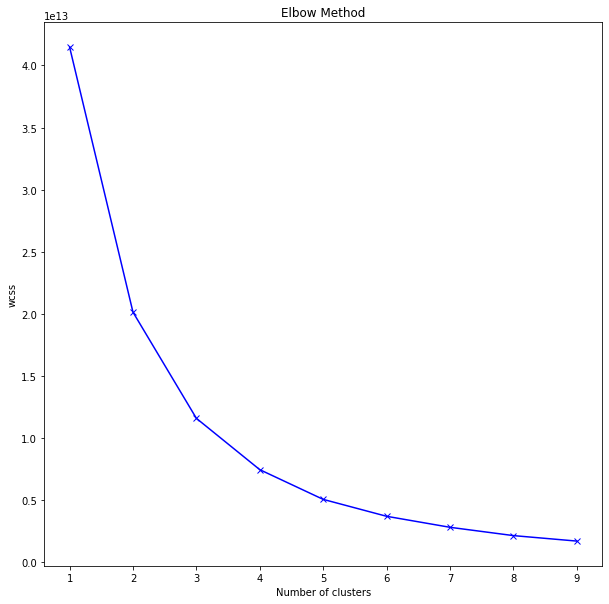

In [14]:
#K-Means Clustering for Customer

# Empty list for storing WCSS across all values of k
dist = []

# Iterate from 1-9
for i in range(1,10):
    # Initialize KMeans algorithm
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit on data
    km.fit(df_clus1)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

# Initialize figure
plt.figure(figsize=(10,10))

# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1,10),dist,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
# Clustering to find 4 clusters(optimum no.) for Customers

km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

df_clus['clusters'] = km.fit_predict(df_clus1)
# Cluster centers
centroids_1 = km.cluster_centers_
print("Cluster centers are:", centroids_1)
print('='*20)

# Within cluster sum of squares
wcss_1 = km.inertia_
print("Within cluster sum of squares is:", wcss_1)

Cluster centers are: [[ 6.70703122e+01  2.19792262e+03  3.93690454e-04  4.72428545e-04
   8.39872969e-04  1.27621322e-02  4.82270807e-04  4.39489777e-02
   5.79020236e-02  4.98674575e-04  3.26467809e-02  1.78121965e-01
   1.96845227e-05  5.24920606e-05  1.49021679e-01  3.23318286e-01
   5.44605128e-04  2.80832524e-03  6.56150757e-06  6.74851054e-03
   1.64037689e-05  1.83722212e-04  7.44403034e-03  2.29652765e-05
   1.27391670e-02  1.83722212e-04  1.17254140e-01  3.87325792e-02
   1.27850975e-02  4.92113068e-05  6.22227763e-02  4.16065195e-02
   2.97180520e-01  9.12049553e-03  5.32256371e-01  2.87262802e-02
   2.87951760e-02  3.60882916e-05  5.57728144e-05]
 [ 5.62420102e+02  6.12920147e+04  1.25849484e-03  1.76189278e-03
   5.14996032e-17  1.13264536e-02  7.55096904e-04  3.77548452e-02
   6.72036245e-02  2.51698968e-04  3.29725648e-02  1.08733954e-01
   1.18584613e-18  2.51698968e-04  2.96753083e-01  1.55046564e-01
   3.02038762e-03  6.04077523e-03  3.15096256e-19  5.53737730e-03
   9

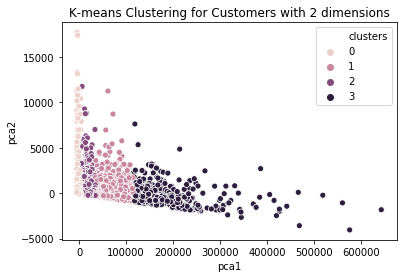

In [28]:
#Plotting the Customer Clusters

reduced_data = PCA(n_components=2).fit_transform(df_clus1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_clus['clusters'], data=results)
plt.title('K-means Clustering for Customers with 2 dimensions')
plt.show()

In [29]:
df_clus.groupby('clusters')['Total Amt Wtd Tax.'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,304820.0,2198.219239,2365.144965,-0.01,300.00000,1300.000,3417.42000,9734.84
1,3971.0,61303.102984,19786.451239,39290.91,45442.57500,54859.030,72126.92500,120982.53
2,33580.0,17274.993898,7037.600135,9730.43,11802.89375,14908.070,20834.37375,39281.81
3,452.0,181336.634630,74496.319925,121412.27,133349.31375,154532.835,200580.88500,648203.49


In [20]:
#Low Revenue Earning Cluster of Customer
low_rev_customer = df_clus[df_clus['clusters']==0]
#Top 5 Low Revenue Earning customer Numbers
low_rev_customer['Customer No.'].value_counts().head()

MFCWP01    31
E1205      31
MFM15      25
E11111     22
148721     21
Name: Customer No., dtype: int64

In [21]:
#Medium Revenue Earning Cluster of Customer
medium_rev_customer = df_clus[df_clus['clusters']==2]
#Top 5 Medium Revenue Earning customer Numbers
medium_rev_customer['Customer No.'].value_counts().head()

MFCCM14    10
12466       8
E1506       7
E11209      5
MFCC018     5
Name: Customer No., dtype: int64

In [22]:
#High Revenue Earning Cluster of Customer
high_rev_customer = df_clus[df_clus['clusters']==1]
#Top 5 High Revenue Earning customer Numbers
high_rev_customer['Customer No.'].value_counts().head()

241519    3
144414    2
244086    2
20038     2
151318    2
Name: Customer No., dtype: int64

In [23]:
#Very High Revenue Earning Cluster of Customer
vhigh_rev_customer = df_clus[df_clus['clusters']==3]
#Top 5 Very High Revenue Earning customer Numbers
vhigh_rev_customer['Customer No.'].value_counts().head()

MFCCM14    2
171679     2
164806     2
167942     1
166948     1
Name: Customer No., dtype: int64

# Clustering for Revenue generated from different Car Models

In [30]:
df_make = tx_data[['Make', 'Model','KMs Reading','Order Type','Service Hour', 'Total Amt Wtd Tax.']]
df_make.head()

,Make,Model,KMs Reading,Order Type,Service Hour,Total Amt Wtd Tax.
0,GENERAL MOTORS,SPARK,49317,Paid Service,477,4051.95
1,TATA MOTORS,INDICA,78584,SMC Value Package,19,1001.29
2,MARUTI SUZUKI,ZEN,33985,Running Repairs,23,233.14
3,TATA MOTORS,INDICA,78584,SMC Redemption,1,0.00
4,HYUNDAI,SANTRO XING,50057,Paid Service,25,2747.12


In [31]:
#Binning The KM Reading assuming Car driven in 1 yr = 25000kms
df_make['Car_Age'] = 1
df_make.loc[df_make['KMs Reading']>25000,'Car_Age'] = 2
df_make.loc[df_make['KMs Reading']>50000,'Car_Age'] = 3
df_make.loc[df_make['KMs Reading']>75000,'Car_Age'] = 4
df_make.loc[df_make['KMs Reading']>100000,'Car_Age'] = 5
df_make.loc[df_make['KMs Reading']>150000,'Car_Age'] = 6
df_make.loc[df_make['KMs Reading']>175000,'Car_Age'] = 7
df_make.loc[df_make['KMs Reading']>200000,'Car_Age'] = 8
df_make.loc[df_make['KMs Reading']>250000,'Car_Age'] = 9
df_make.loc[df_make['KMs Reading']>275000,'Car_Age'] = 10


In [32]:
#Concatenate Make and Model
df_make['Car_Model'] = df_make['Make'] + ' - ' + df_make['Model']

In [33]:
df_make.head()

,Make,Model,KMs Reading,Order Type,Service Hour,Total Amt Wtd Tax.,Car_Age,Car_Model
0,GENERAL MOTORS,SPARK,49317,Paid Service,477,4051.95,2,GENERAL MOTORS - SPARK
1,TATA MOTORS,INDICA,78584,SMC Value Package,19,1001.29,4,TATA MOTORS - INDICA
2,MARUTI SUZUKI,ZEN,33985,Running Repairs,23,233.14,2,MARUTI SUZUKI - ZEN
3,TATA MOTORS,INDICA,78584,SMC Redemption,1,0.00,4,TATA MOTORS - INDICA
4,HYUNDAI,SANTRO XING,50057,Paid Service,25,2747.12,3,HYUNDAI - SANTRO XING


In [34]:
#Groupby
df_make1 = df_make.groupby(['Car_Model', 'Car_Age', 'Order Type'])['Service Hour','Total Amt Wtd Tax.'].mean().reset_index()
df_make1.head()

,Car_Model,Car_Age,Order Type,Service Hour,Total Amt Wtd Tax.
0,AUDI - A4,1,Accidental,69.750000,17103.752500
1,AUDI - A4,1,Mechanical,1.000000,386.960000
2,AUDI - A4,1,Paid Service,3.500000,452.130000
3,AUDI - A4,1,Running Repairs,5.545455,1008.640909
4,AUDI - A4,2,Accidental,101.000000,26924.585000


In [35]:
#One- hot encoding for Order Type
order = pd.get_dummies(df_make1['Order Type'], prefix='order')
df_make1= pd.concat([df_make1, order], axis=1)
df_make1.drop(['Order Type'],1,inplace=True)
df_make1.head()

,Car_Model,Car_Age,Service Hour,Total Amt Wtd Tax.,order_Accidental,order_Mechanical,order_Paid Service,order_Repeat Order,order_Running Repairs,order_SMC Redemption,order_SMC Value Package,order_WBW Order,order_Workshop Damage
0,AUDI - A4,1,69.750000,17103.752500,1,0,0,0,0,0,0,0,0
1,AUDI - A4,1,1.000000,386.960000,0,1,0,0,0,0,0,0,0
2,AUDI - A4,1,3.500000,452.130000,0,0,1,0,0,0,0,0,0
3,AUDI - A4,1,5.545455,1008.640909,0,0,0,0,1,0,0,0,0
4,AUDI - A4,2,101.000000,26924.585000,1,0,0,0,0,0,0,0,0


In [36]:
df_make2 = df_make1.drop('Car_Model',1)
df_make2.head()

,Car_Age,Service Hour,Total Amt Wtd Tax.,order_Accidental,order_Mechanical,order_Paid Service,order_Repeat Order,order_Running Repairs,order_SMC Redemption,order_SMC Value Package,order_WBW Order,order_Workshop Damage
0,1,69.750000,17103.752500,1,0,0,0,0,0,0,0,0
1,1,1.000000,386.960000,0,1,0,0,0,0,0,0,0
2,1,3.500000,452.130000,0,0,1,0,0,0,0,0,0
3,1,5.545455,1008.640909,0,0,0,0,1,0,0,0,0
4,2,101.000000,26924.585000,1,0,0,0,0,0,0,0,0


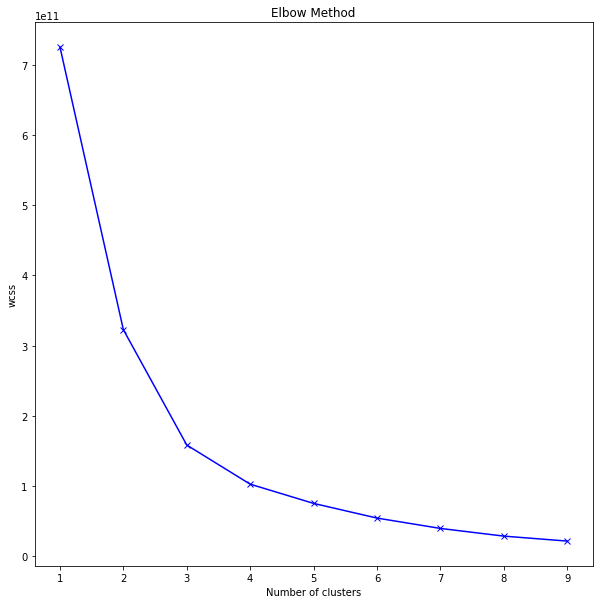

In [37]:
#K-Means Clustering for Car Models

# Empty list for storing WCSS across all values of k
dist = []

# Iterate from 1-9
for i in range(1,10):
    # Initialize KMeans algorithm
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit on data
    km.fit(df_make2)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

# Initialize figure
plt.figure(figsize=(10,10))

# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1,10),dist,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [38]:
#Clustering for making 4 clusters
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
#km.fit(df_hr_amt)
df_make1['clusters'] = km.fit_predict(df_make2)
# Cluster centers
centroids_1 = km.cluster_centers_
print("Cluster centers are:", centroids_1)
print('='*20)

# Within cluster sum of squares
wcss_1 = km.inertia_
print("Within cluster sum of squares is:", wcss_1)

Cluster centers are: [[ 4.41157205e+00  2.22334519e+02  1.50438734e+04  7.01965066e-01
   6.44104803e-02  1.60480349e-01  1.12410081e-15  6.44104803e-02
   2.77555756e-17  4.36681223e-03  4.36681223e-03  1.90819582e-17]
 [ 5.55000000e+00  5.34497689e+02  9.08940287e+04  8.00000000e-01
   5.00000000e-02  7.50000000e-02 -5.55111512e-17  7.50000000e-02
   4.16333634e-17  5.55111512e-17  1.73472348e-18  1.30104261e-18]
 [ 4.43816388e+00  9.63367081e+01  2.45140859e+03  4.47647951e-02
   1.57625190e-01  2.32359636e-01  8.27010622e-02  2.85660091e-01
   9.73065250e-02  9.48406677e-02  2.08649469e-03  2.65553869e-03]
 [ 4.91203704e+00  3.75745676e+02  3.58942134e+04  8.65740741e-01
   1.85185185e-02  7.40740741e-02 -1.80411242e-16  3.70370370e-02
   1.66533454e-16 -3.05311332e-16  4.62962963e-03 -1.08420217e-17]]
Within cluster sum of squares is: 102799757293.05472


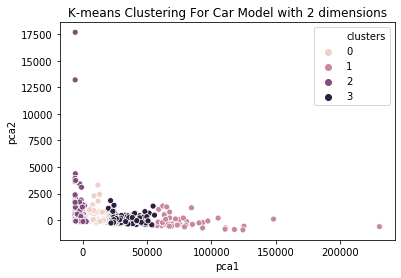

In [39]:
#plotting Model Segmentation 
reduced_data = PCA(n_components=2).fit_transform(df_make2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_make1['clusters'], data=results)
plt.title('K-means Clustering For Car Model with 2 dimensions')
plt.show()

In [40]:
df_make1.groupby('clusters')['Total Amt Wtd Tax.'].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,916.0,15043.873445,4491.979360,8759.268133,11233.294589,14248.022292,18372.763565,25313.086667
1,40.0,90894.028680,31900.074596,63699.750000,71364.763409,81153.887000,99085.752500,236302.740000
2,5272.0,2451.408591,2215.332188,0.000000,389.540000,2023.090327,3948.301573,8737.100000
3,216.0,35894.213426,9146.334026,25497.474875,28810.720000,32463.360909,41675.225000,61688.458333


In [41]:
#Low Revenue Earning Cluster of Car Models
low_rev_model = df_make1[df_make1['clusters']==2]
#Top 5 Low Revenue Earning Models
low_rev_model['Car_Model'].value_counts().head()

TOYOTA - INNOVA         61
HYUNDAI - SANTRO        61
MARUTI SUZUKI - 800     58
TATA MOTORS - INDICA    57
TATA MOTORS - VISTA     57
Name: Car_Model, dtype: int64

In [42]:
#Medium Revenue Earning Cluster of Car Models
medium_rev_model = df_make1[df_make1['clusters']==0]
#Top 5 Medium Revenue Earning Models
medium_rev_model['Car_Model'].value_counts().head()

MAHINDRA &  MAHINDRA - SCORPIO NEF    15
MAHINDRA &  MAHINDRA - XYLO           13
HYUNDAI - VERNA                       12
MAHINDRA &  MAHINDRA - ARMADA         12
SKODA - OCTAVIA                       11
Name: Car_Model, dtype: int64

In [43]:
#High Revenue Earning Cluster of Car Models
high_rev_model = df_make1[df_make1['clusters']==3]
#Top 5 High Revenue Earning Models
high_rev_model['Car_Model'].value_counts().head()

MAHINDRA &  MAHINDRA - BOLERO           8
MAHINDRA &  MAHINDRA - BOLERO PIK UP    8
TATA MOTORS - SUMO                      8
TOYOTA - QUALIS                         7
GENERAL MOTORS - TAVERA                 5
Name: Car_Model, dtype: int64

In [44]:
#Very High Revenue Earning Cluster of Car Models
vhigh_rev_model = df_make1[df_make1['clusters']==1]
#Top 5 Very High Revenue Earning Models
vhigh_rev_model['Car_Model'].value_counts().head(10)

MAHINDRA &  MAHINDRA - MAHINDRA PIK UP    3
MITSUBISHI MOTORS - PAJERO                2
MAHINDRA &  MAHINDRA - MAXX               2
GENERAL MOTORS - CAPTIVA                  2
GENERAL MOTORS - BEAT                     2
MAHINDRA &  MAHINDRA - XUV 500            1
MITSUBISHI MOTORS - MONTERO               1
AUDI - A6                                 1
HYUNDAI - ACCENT                          1
MAHINDRA &  MAHINDRA - MAXXIMO            1
Name: Car_Model, dtype: int64

In [95]:
tx_data.Month.unique()

array([12,  1, 11,  4,  5,  3,  9,  7, 10,  8,  6,  2], dtype=int64)